# Introduction
    - This file contains scrips used to find charged pairs and atoms, calculate distances, plot scaling relations.

# Sections
    - Find charged contact res_pairs
    - Sort res_pairs into matricies
    - Compute dynamics
    - Make data block: block.npy
    - Convert block to pandas dataframe: block.csv
    - Visualize conductivities and dynamics
    - Separating res_pairs to top or bottom
    - Data Smoothing
    - Scaling Relations: Making Figures

# General Guide
    - Distance related data are stored in a csv file already, so find charged contact pairs, calculate distance related sections of the code do not need to be run to show figures.
    - In general, for each section, running the scrips in order from the top will give you the graphical result.
    - The figures are okay as is, but can be manipulated using matplotlib stuff.

## Caution
    - When doing analysis, running the below code once is useful
    - When you mess up the code, just git pull a new copy from GitLab again.


In [2]:
#####################################
# Press Shift + Enter to Run Script
# Run this script first at the beginning

# Basic Analysis tools
import numpy as np
import pandas as pd

# Basic Graphing tools
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Modeling tools
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Find charged contact res_pairs
    - pairs are already found and stored in charge_charge or charge_charge_tyr, the latter 
    
## Input
    - out/hc_contact.npy: 
    - out/ec_contact.npy: 
    - out/lamd_contact.npy: 
    - out/ct_pairs.npy: 
    
## Output
    - out/charge_charge_tyr.npy: residue pair info where both residues are charged or tyr
    - out/charge_charge.npy: residue pair info where both residues are charged
    - out/charge_unchar.npy: residue pair info where one residue is charged
    - out/unchar_unchar.npy: residue pair info where both residues are uncharged

In [9]:
# Load all contact residue pairs info and conductivity info. <= Found in hydrogen_bond section.

ct_hc = np.load('out/hc_contact.npy') # heat conductivity for all 991 contact res pairs
ct_ec = np.load('out/ec_contact.npy') # heat conductivity for all 991 contact res pairs
ct_lamd = np.load('out/lamd_contact.npy') # lambda for all 991 contact res pairs
ct_pairs = np.load('out/ct_pairs.npy')

# Take the average, for visualization. Not used for scaling.
avg_hc = ct_hc.mean(axis=1)
avg_ec = ct_ec.mean(axis=1)

In [10]:
###############################################
#     Making the charge_charge_tyr pair list

# the residue tyr can be included or excluded, for my analysis, I included it becaues Leitner et el included the residue.
# to do so, just delete or add 'TYR' and run the code.


def check_charged(aa_name):
    charged = ['ARG','LYS','GLU','ASP','HIS','TYR']
    if aa_name in charged:
        return True
    return False

charge_charge = []
charge_unchar = []
unchar_unchar = []

for i in range(len(ct_pairs)):
    if check_charged(ct_pairs[i][0].split('_')[1]):
        if check_charged(ct_pairs[i][1].split('_')[1]):
            charge_charge.append([i, ct_pairs[i][0],ct_pairs[i][1]])
        else:
            charge_unchar.append([i, ct_pairs[i][0],ct_pairs[i][1]])
    elif check_charged(ct_pairs[i][1].split('_')[1]):
        charge_unchar.append([i, ct_pairs[i][0],ct_pairs[i][1]])
    else:
        unchar_unchar.append([i, ct_pairs[i][0],ct_pairs[i][1]])

#np.save('out/charge_charge', charge_charge)
#np.save('out/charge_unchar', charge_unchar)
#np.save('out/unchar_unchar', unchar_unchar)
#np.save('out/charge_charge_tyr', charge_charge)

62
[['39' '00004_ARG' '00088_LYS']
 ['40' '00004_ARG' '00087_TYR']
 ['43' '00004_ARG' '00090_GLU']
 ['45' '00004_ARG' '00007_ARG']
 ['48' '00004_ARG' '00091_GLU']
 ['50' '00005_GLU' '00088_LYS']
 ['51' '00005_GLU' '00087_TYR']
 ['54' '00005_GLU' '00007_ARG']
 ['56' '00005_GLU' '00008_ARG']
 ['72' '00007_ARG' '00088_LYS']
 ['82' '00007_ARG' '00087_TYR']
 ['84' '00007_ARG' '00047_GLU']
 ['85' '00007_ARG' '00052_ASP']
 ['86' '00007_ARG' '00049_ARG']
 ['95' '00008_ARG' '00047_GLU']
 ['98' '00008_ARG' '00063_ARG']
 ['183' '00013_ARG' '00075_LYS']
 ['430' '00026_GLU' '00029_GLU']
 ['435' '00026_GLU' '00094_ARG']
 ['436' '00026_GLU' '00068_GLU']
 ['439' '00027_ASP' '00063_ARG']
 ['441' '00027_ASP' '00094_ARG']
 ['443' '00027_ASP' '00029_GLU']
 ['464' '00029_GLU' '00088_LYS']
 ['468' '00029_GLU' '00063_ARG']
 ['469' '00029_GLU' '00094_ARG']
 ['473' '00029_GLU' '00091_GLU']
 ['641' '00043_ASP' '00049_ARG']
 ['642' '00043_ASP' '00047_GLU']
 ['651' '00047_GLU' '00087_TYR']
 ['653' '00047_GLU' '00

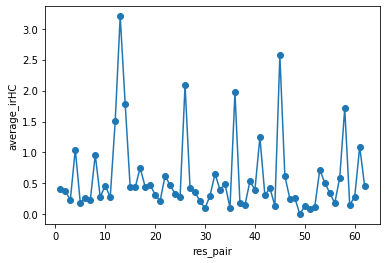

In [13]:
###########################################################################
# Visualize charge_charge_tyr

charge_charge_tyr = np.load('out/charge_charge_tyr.npy')
charge_inter = []

# Trying to choose charge_charge_tyr pairs from avg_hc, which contains all 991 contacts
for i in range(len(charge_charge_tyr)):
    pair_num = int(charge_charge_tyr[i][0])
    charge_inter.append(avg_hc[pair_num])

x1 = np.linspace(1, len(charge_inter), len(charge_inter))
y1 = charge_inter

print(len(charge_charge_tyr))
print(charge_charge_tyr)

plt.plot(x1, y1, 'o-')
plt.xlabel('res_pair')
plt.ylabel('average_irHC')

plt.show()
# Since the irhc were all very high relative to the rest of the pack, we decided to analyze all.

# Sort res_pairs into matricies
## Input
    - out/stripped.prmtop: provides id, atom name, residue name for each atom of interest
    - out/charge_charge_tyr.npy: provides residue pair names
## Output
    - out/charge_id.npy: matrix of atomic ids of all atomic pair combinations for all 62 residue pairs
    - out/charge_atom_name.npy: matrix of atomic names of all atomic pair combinations for all 62 residue pairs

# Compute dynamics
## Input
    - out/charge_id.npy
    - out/charge_atom_name.npy
## Output
    - crd_analysis/mean_sq_dist-0??.npy


In [15]:
# Setup ##########################

# IMORTING #################################
%load_ext cython
import curp
tpl = curp.get_tpl('amber', 'out/stripped.prmtop')
pairs_ch = np.load('out/charge_charge_tyr.npy')


# Essential Functions #########################
def cal_mean_sq_dist():
    import numpy as np
    import netCDF4

    mean_sq_dist = np.zeros((len(charge_id),len(charge_id[0]),3))
    for i in range(len(charge_id)): # residue pair
        print('ith residue pair')
        print(i)

        for j in range(len(charge_id[0])): # charged atom id pair
            if all(charge_id[i][j] == [-1,-1]):
                break
            
            dist = distance(charge_id[i][j][0] , charge_id[i][j][1], traj_id)
            dist = np.array(dist)
            dist_sq = dist**2
            avg_dist = dist.mean()
            avg_dist_sq = dist_sq.mean()
            vari = (dist - avg_dist)**2
            avg_f = vair.mean()
            mean_sq_dist[i][j][0] = avg_dist_sq
            mean_sq_dist[i][j][1] = avg_dist
            mean_sq_dist[i][j][2] = avg_f
            print('jth atom pair')
            print(j)

    np.save("crd_analysis/mean_sq_dist-0" + traj_id, mean_sq_dist)

def charged_atom_name(amino_name):
    # ARG, HIP, LYS, ASP, GLU, (TYR, this is special)
    if amino_name == 'ARG':
        return ['NE', 'NH1', 'NH2']
    elif amino_name == 'HIP':
        return ['ND1', 'NE2']
    elif amino_name == 'LYS':
        return ['NZ']
    elif amino_name == 'ASP':
        return ['OD1', 'OD2']
    elif amino_name == 'GLU':
        return ['OE1', 'OE2']
    elif amino_name == 'TYR':
        return ['OH']
    else:
        print('ERROR amino name does not match polar residues')
        return []

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [16]:
# Sort res_pairs into matricies ###############################

charge_id = [] # 62 charged pairs * 6 combinations
charge_atom_name = [] # 62 charged pairs * 6 combinations

for i in range(len(pairs_ch)):
    res_a_id = int(pairs_ch[i][1].split('_')[0])
    res_b_id = int(pairs_ch[i][2].split('_')[0])
    res_a_name = str(pairs_ch[i][1].split('_')[1])
    res_b_name = str(pairs_ch[i][2].split('_')[1])
    atom_name_a = charged_atom_name(res_a_name)
    atom_name_b = charged_atom_name(res_b_name)
    
    tmp_atom_id_a = [] # eg [5, 6, 10]
    for i in range(len(atom_name_a)):
        matches = (ids for ids, element in enumerate(tpl.get_residue_info()['ids']) if element==int(res_a_id))
        for j in matches:
            if tpl.get_atom_info()['names'][j] == atom_name_a[i]:
                tmp_atom_id_a.append(j)
                break
    
    tmp_atom_id_b = []
    for i in range(len(atom_name_b)):
        matches = (ids for ids, element in enumerate(tpl.get_residue_info()['ids']) if element==int(res_b_id))
        for j in matches:
            if tpl.get_atom_info()['names'][j] == atom_name_b[i]:
                tmp_atom_id_b.append(j)
                break
    
    tmp_atom_id_tot = [] # eg [[10, 13], [23, 25], [50, 40], ..]
    tmp_atom_name_tot = []
        
    for i in range(len(tmp_atom_id_a)):
        for j in range(len(tmp_atom_id_b)):
            tmp_atom_id_tot.append([tmp_atom_id_a[i],tmp_atom_id_b[j]])
            tmp_atom_name_tot.append([atom_name_a[i],atom_name_b[j]])
        
    # fix the length of [] to 9
    while len(tmp_atom_id_tot) < 9: # 9 because a residue can have uptill 3 charged atoms, at most a res pair can have 9 combinations of distances.
        tmp_atom_id_tot.append([-1,-1])
    
    while len(tmp_atom_name_tot) < 9: 
        tmp_atom_name_tot.append(['None','None'])

    charge_id.append(tmp_atom_id_tot)
    charge_atom_name.append(tmp_atom_name_tot)
    
np.save('out/charge_id', charge_id)
np.save('out/charge_atom_name' ,charge_atom_name)

In [2]:
%%cython -a
import netCDF4
import numpy as np

cpdef distance(int ids_1, int ids_2, str traj_id):
    distance = []
    cdef int step = 0
    cdef double x1, y1, z1, x2, y2, z2 
    
    for j in range(10):
        crd_info = netCDF4.Dataset('../store-data/traj/0'+traj_id+'/strip-0'+str(j)+'.nccrd','r')
        coordinates = np.array(crd_info.variables['coordinates'])
        for step in range(len(coordinates)):
            x1 = coordinates[step][ids_1][0]
            y1 = coordinates[step][ids_1][1]
            z1 = coordinates[step][ids_1][2]

            x2 = coordinates[step][ids_2][0]
            y2 = coordinates[step][ids_2][1]
            z2 = coordinates[step][ids_2][2]

            distance.append(((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)**(1/2))
    return distance

In [4]:
# Compute Dynamics ########################################

charge_id = np.load('out/charge_id.npy')
charge_atom_name = np.load('out/charge_atom_name.npy')

for i in range(9, 10):
    if i <10:
        traj_id = '0' + str(i)
    else:
        traj_id = str(i)
    
    cal_mean_sq_dist()
    
    print('trajectory', i)

ith residue pair
0
jth atom pair
0
jth atom pair
1
jth atom pair
2
ith residue pair
1
jth atom pair
0
jth atom pair
1
jth atom pair
2
ith residue pair
2
jth atom pair
0
jth atom pair
1
jth atom pair
2
jth atom pair
3
jth atom pair
4
jth atom pair
5
ith residue pair
3
jth atom pair
0
jth atom pair
1
jth atom pair
2
jth atom pair
3
jth atom pair
4
jth atom pair
5
jth atom pair
6
jth atom pair
7
jth atom pair
8
ith residue pair
4
jth atom pair
0
jth atom pair
1
jth atom pair
2
jth atom pair
3
jth atom pair
4
jth atom pair
5
ith residue pair
5
jth atom pair
0
jth atom pair
1
ith residue pair
6
jth atom pair
0
jth atom pair
1
ith residue pair
7
jth atom pair
0
jth atom pair
1
jth atom pair
2
jth atom pair
3
jth atom pair
4
jth atom pair
5
ith residue pair
8
jth atom pair
0
jth atom pair
1
jth atom pair
2
jth atom pair
3
jth atom pair
4
jth atom pair
5
ith residue pair
9
jth atom pair
0
jth atom pair
1
jth atom pair
2
ith residue pair
10
jth atom pair
0
jth atom pair
1
jth atom pair
2
ith re

# Make data block: block.npy
    - from several possble atomic pairs between a single residue pair, we choose the atomic pair with the shortest average msd and store datas in block_charge_dist and block_charge_atom_name.
## Input
    - out/charge_atom_name.npy
    - crd_analysis/mean_sq_dist-0??.npy
## Output
    - out/block_dynamic_ch.npy: 100 trajectories x 62 pairs x 3 distance variables, msd, avg_dist, variance
    - out/block_atom_name_ch.npy: 100 trajectories x 62 pairs x 2 atomic pair id

In [206]:
# Pick Shortest Meas Square Distance
#####################################################
# Result : (traj_num, charge_pair_num, (msd,md,mf)), usually (100, 62, 3)

charge_atom_name = np.load('out/charge_atom_name.npy')

traj_ini = 0
traj_fin = 99

block_charge_dist = np.zeros(((traj_fin - traj_ini + 1),len(charge_atom_name),3))
block_charge_atom_name = []

for i in range(traj_ini,traj_fin+1): # i is the traj number
    if i < 10:
        traj_id = '00'+str(i)
    else:
        traj_id = '0'+str(i)

    tmp_dist = np.load('crd_analysis/mean_sq_dist-'+traj_id+'.npy')
    tmp_atom_name = []
    for j in range(len(tmp_dist)): # j is the charge pair number out of 62
        tmp_msd = []
        tmp_msd_ini = tmp_dist[j].transpose()[0]
        for k in range(len(tmp_msd_ini)): # k is the min_dist_index number
            if tmp_msd_ini[k] > 0:
                tmp_msd.append(tmp_msd_ini[k])
            else:
                break

        min_dist_index = tmp_msd.index(min(tmp_msd))
        
        block_charge_dist[i][j] = tmp_dist[j][min_dist_index]
        tmp_atom_name.append(charge_atom_name[j][min_dist_index].tolist())
    
    # stack the lists
    block_charge_atom_name.append(tmp_atom_name)

np.save('out/block_dynamic_ch', block_charge_dist)

block_charge_atom_name = np.asarray(block_charge_atom_name)
np.save('out/block_atom_name_ch', block_charge_atom_name)

# Convert block to pandas dataframe: block.csv
    
## Input
    - out/block_dynamic_ch.npy
    - out/charge_charge_tyr.npy
    - out/ec_contact.npy: computed in 'hydrogen_bond' notebook, section 'Sorting Data'
    - out/hc_contact.npy: computed in 'hydrogen_bond' notebook, section 'Sorting Data'
    - out/lamd_contact.npy: computed in 'hydrogen_bond' notebook, section 'Sorting Data'
## Output
    - out/block_dynamic_ch.csv: 62 residue pairs x 100 trajectories x 3 msd, avg_dist, variance
    - out/pairs_ch.csv: 62 pairs x (res_a, res_b, contact_tag (id from 991 contact residue pairs))
    - out/block_conduct_ch.csv: 62 residue pairs x 100 trajectories x 3 irec, irhc, lambda

In [41]:
# Make block_charge_dist ###########################################
block_charge_dist = np.load('out/block_dynamic_ch.npy')

# Make index 
traj_num = 100
column_names =  [['mean_sq_dist']*traj_num + ['mean_dist']*traj_num + ['mean_variance']*traj_num + list(range(traj_num))*3]
column_names = np.asarray(column_names)
column_names = column_names.reshape((2,traj_num*3))
column_names.transpose()[:80]
index = pd.MultiIndex.from_arrays(column_names, names=['keys', 'traj'])

# Store to df
l = int(len(index)/3)
mean_sq_dist = pd.DataFrame(data=block_charge_dist.transpose()[0], columns=index[:l])
mean_dist = pd.DataFrame(data=block_charge_dist.transpose()[1], columns=index[l:l*2])
mean_vari = pd.DataFrame(data=block_charge_dist.transpose()[2], columns=index[l*2:l*3])
df = mean_sq_dist.join(mean_dist).join(mean_vari)

# Save as csv
df.to_csv('out/block_dynamic_ch.csv')


# Make pairs_charged ##########################################
pairs_ch = np.load('out/charge_charge_tyr.npy')

# Make contact_tag 
contact_tag = pd.DataFrame(data=pairs_ch.transpose()[0], columns=['contact_tag'], dtype=int)
res_a = pd.DataFrame(data=pairs_ch.transpose()[1], columns=['res_a'])
res_b = pd.DataFrame(data=pairs_ch.transpose()[2], columns=['res_b'])

pairs = res_a.join(res_b).join(contact_tag)

# Save as csv 
pairs.to_csv('out/pairs_ch.csv')


# Make block_conduct_ch.csv ##################################
# load data
ct_ec = np.load('out/ec_contact.npy') # heat conductivity for all 991 contact res pairs
ct_hc = np.load('out/hc_contact.npy') # heat conductivity for all 991 contact res pairs
ct_lamd = np.load('out/lamd_contact.npy') # lambda for all 991 contact res pairs

# numpy form
traj_num = 100
block_conduct_ch = np.zeros((3, len(pairs), traj_num))
for i in range(len(pairs)):
    block_conduct_ch[0][i] = ct_ec[pairs.contact_tag[i]]
    block_conduct_ch[1][i] = ct_hc[pairs.contact_tag[i]]
    block_conduct_ch[2][i] = ct_lamd[pairs.contact_tag[i]]

# Make index
traj_num = 100
column_names =  [['ec']*traj_num + ['hc']*traj_num + ['lambdx']*traj_num + list(range(traj_num))*3]
column_names = np.asarray(column_names)
column_names = column_names.reshape((2,traj_num*3))
index = pd.MultiIndex.from_arrays(column_names, names=['keys', 'traj'])

# Save numpy form to df
l = int(len(index)/3)
df_ec = pd.DataFrame(data=block_conduct_ch[0], columns=index[:l])
df_hc = pd.DataFrame(data=block_conduct_ch[1], columns=index[l:l*2])
df_lamd = pd.DataFrame(data=block_conduct_ch[2], columns=index[l*2:l*3])
df = df_ec.join(df_hc).join(df_lamd)

# Save as csv 
df.to_csv('out/block_conduct_ch.csv')

# Visualize conductivities and dynamics


In [14]:
# Load csv files ################################################

df_dynamic_ch = pd.read_csv('out/block_dynamic_ch.csv', header=[0, 1], index_col=0)
df_conduct_ch = pd.read_csv('out/block_conduct_ch.csv', header=[0, 1], index_col=0)
pairs_ch = pd.read_csv('out/pairs_ch.csv', header=0, index_col=0)

# Unit convert fs -> ps, A -> nm
df_dynamic_ch.mean_sq_dist = df_dynamic_ch.mean_sq_dist/100
df_dynamic_ch.mean_dist = df_dynamic_ch.mean_dist/10
df_dynamic_ch.mean_variance = df_dynamic_ch.mean_variance/100

df_conduct_ch.ec = df_conduct_ch.ec*1000
df_conduct_ch.hc = df_conduct_ch.hc*10
df_conduct_ch.lambdx = df_conduct_ch.lambdx

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


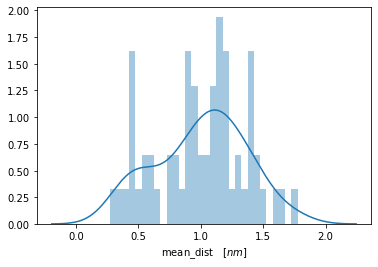

In [16]:
# Distribution of average charge pair distances
#

x = df_dynamic_ch.mean_dist.mean(axis=1)
sns.distplot(x, bins=30, axlabel='mean_dist   $[nm]$')

# not much close pairs, ie pairs with dist below 5 \AA. most pairs are rather distant compared to pairs found for hbond.

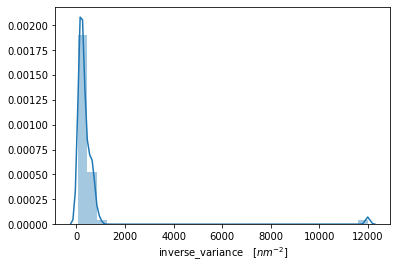

In [175]:
# Distribution of average charge pair variance
#

x = df_dynamic_ch.mean_variance.mean(axis=1)**(-1)
sns.distplot(x, bins=30, axlabel='inverse_variance   $[nm^{-2}]$')

        res_a      res_b  contact_tag
12  00007_ARG  00052_ASP           85
44  00061_ASP  00063_ARG          840
60  00092_TYR  00096_GLU          980


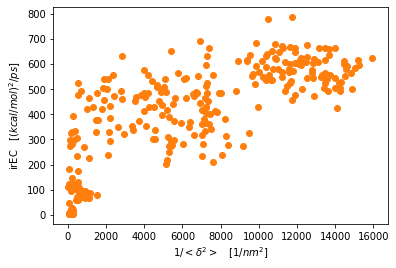

In [22]:
# irec vs inverse variance #######################

# charge contact distance threshold 
short = df_dynamic_ch.mean_dist.mean(axis=1) < 0.4 # adjust here
print(pairs_ch[short])

# genki: charge variance data
x = df_dynamic_ch[short].mean_variance**(-1)
y = df_conduct_ch[short].ec

plt.plot(x, y, 'o', color='tab:orange')

# korey/david: charge variance
coeffs = [177.39, 0.0398] # r^2 = 0.89
exp = [0,1]
y_hp_charged = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])/1000
x_1 = x_1/100

plt.xlabel(r'$1/<\delta ^{2}>$   $[1/nm^{2}]$')
plt.ylabel(r'irEC   $[(kcal/mol)^2 /ps]$')

#plt.xlim(-0.2,10)
#plt.ylim(0,0.05)

plt.show()

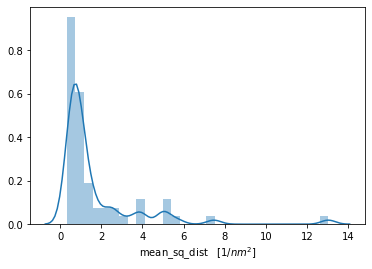

In [179]:
# Distribution of inverse MSD ################

x = df_dynamic_ch.mean_sq_dist.mean(axis=1)**(-1)
sns.distplot(x, bins=30, axlabel='mean_sq_dist   $[1/nm^2]$')

# Separating res_pairs to top or bottom
    - deciding for each residue pair wheather it goes on the top or bottom line

## Input
    - out/block_dynamic_ch.csv
    - out/block_conduct_ch.csv
    - out/pairs_ch.csv
## Output
    - list of top residues and bottom residues

In [26]:
# Load csv files ################################################

df_dynamic_ch = pd.read_csv('out/block_dynamic_ch.csv', header=[0, 1], index_col=0)
df_conduct_ch = pd.read_csv('out/block_conduct_ch.csv', header=[0, 1], index_col=0)
pairs_ch = pd.read_csv('out/pairs_ch.csv', index_col=0)

# Unit convert fs -> ps, A -> nm
df_dynamic_ch.mean_sq_dist = df_dynamic_ch.mean_sq_dist/100
df_dynamic_ch.mean_dist = df_dynamic_ch.mean_dist/10
df_dynamic_ch.mean_variance = df_dynamic_ch.mean_variance/100

df_conduct_ch.ec = df_conduct_ch.ec*1000
df_conduct_ch.hc = df_conduct_ch.hc*10
df_conduct_ch.lambdx = df_conduct_ch.lambdx

No handles with labels found to put in legend.


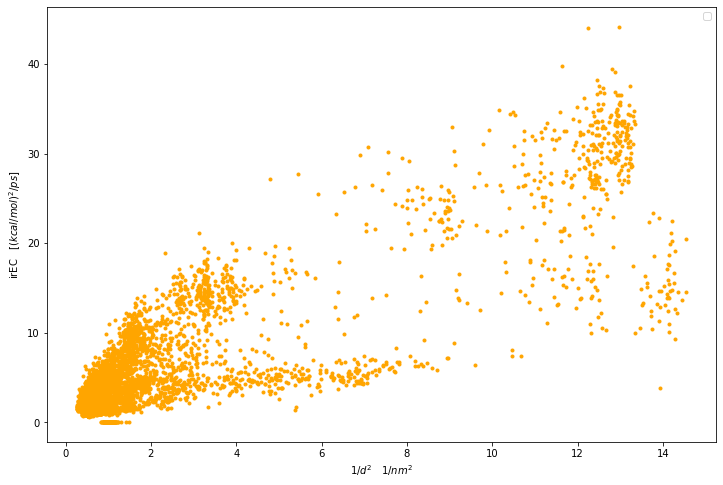

In [8]:
# figure size
plt.figure(figsize=(12,8))

# all points
#x1 = np.log10((df_dynamic_ch.mean_sq_dist)**(-1))
#y1 = np.log10(df_conduct_ch.ec)
x1 = (df_dynamic_ch.mean_sq_dist)**(-1)
y1 = df_conduct_ch.hc
plt.plot(x1, y1, '.', color='orange')

# points of interest: pair_num, top, or bottom
#tmp = bottom
#x2 = np.log10(((df_dynamic_ch.loc[tmp].mean_sq_dist)**(-1)))
#y2 = np.log10(df_conduct_ch.loc[tmp].ec)
#plt.plot(x2, y2, '.', color='blue')


# Reference Data from Leitner et al. #############################
x_1 = np.linspace(0.3, 14, 100)

# Myoglobin
coeffs = [0, 10**(1.4)]
exp = [0,1.2]
#y_myo1 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])/1000

coeffs = [0, 10**(1.8)]
exp = [0,0.3]
#y_myo2 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])/1000

# HP36
coeffs = [0, 10**(0.3)]
exp = [0,1.93]
#y_hp = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])/1000

#plt.plot(x_1, y_myo1, '-', color='red', label='myo_top')
#plt.plot(x_1, y_myo2, '-', color='cyan', label='myo_bottom')
#plt.plot(x_1, y_hp, '-', color='yellow', label='hp36')


plt.legend()
plt.xlabel(r'$1/d^{2}$   $1/nm^2$')
plt.ylabel(r'irEC   $[(kcal/mol)^2 /ps]$')

#print('pair_number is ' + str(pair_num))
#print(pairs_ch.loc[pair_num])
#pair_num += 1
plt.show()

In [195]:
pair_num = 48

In [35]:
# Sort the pairs by their indicies 

bottom = [2,3,4,5,6,7,8,9,10,14,15,17,18,19,20,22,23,24,26,27,28,29,30,32,33,34,36,37,38,39,41,43,47,49,50,52,54,55,58,61]
top = [0,1,11,12,13,16,21,25,31,35,40,42,44,45,46,51,53,56,57,59,60]
outlier = [48] # residue pair between tyr and tyr

res_a      res_b  contact_tag
0   00004_ARG  00088_LYS           39
1   00004_ARG  00087_TYR           40
2   00004_ARG  00090_GLU           43
3   00004_ARG  00007_ARG           45
4   00004_ARG  00091_GLU           48
..        ...        ...          ...
57  00091_GLU  00094_ARG          973
58  00091_GLU  00096_GLU          975
59  00092_TYR  00094_ARG          977
60  00092_TYR  00096_GLU          980
61  00094_ARG  00096_GLU          987

[62 rows x 3 columns]

# Raw Data TC vs inverse msd

In [29]:
df_dynamic_ch.mean_sq_dist

traj         0         1         2         3         4         5         6  \
0     1.401599  1.401599  1.388702  1.461396  1.386354  1.392938  0.984396   
1     1.070311  1.070311  1.041448  1.039748  1.007204  1.052453  1.040091   
2     2.034232  2.034232  1.814883  1.854901  1.962061  1.774453  1.895691   
3     0.687440  0.687440  0.700779  0.702479  0.620026  0.677597  0.674036   
4     1.958988  1.958988  1.890153  1.840715  1.783128  1.881223  1.818369   
..         ...       ...       ...       ...       ...       ...       ...   
57    0.898120  0.898120  0.930849  0.890905  0.914201  0.796847  0.891042   
58    1.938962  1.938962  1.902519  1.773950  1.800175  1.877763  1.969478   
59    1.214510  1.214510  1.279083  1.277585  1.221466  1.227477  1.185479   
60    0.071835  0.071835  0.074349  0.071928  0.071715  0.074226  0.072835   
61    1.537381  1.537381  1.547658  1.534215  1.524163  1.501577  1.482105   

traj         7         8         9  ...        90        91        92  \
0     1.773357  1.263464  1.394029  ...  1.795774  1.798478  1.544960   
1     1.035462  0.997292  1.055250  ...  1.079754  0.742118  0.772616   
2     2.554174  2.499925  2.596107  ...  1.975524  2.248267  2.122904   
3     0.727130  0.684698  0.731290  ...  0.741480  0.579055  0.545504   
4     2.470005  2.940109  2.848059  ...  2.445690  2.951691  2.671868   
..         ...       ...       ...  ...       ...       ...       ...   
57    0.621389  0.387895  0.451722  ...  0.080259  0.079494  0.079435   
58    2.059574  2.030039  2.068708  ...  1.972458  1.795310  1.946919   
59    1.133224  1.042631  1.163240  ...  1.560681  1.618594  1.617063   
60    0.070768  0.070842  0.070646  ...  0.111676  0.109821  0.129572   
61    1.468491  1.354195  1.490649  ...  1.657073  1.644737  1.657919   

traj        93        94        95        96        97        98        99  
0     1.798313  1.698022  1.486519  1.629738  1.693219  1.789440  1.733179  
1     1.039705  1.081645  0.898535  0.791207  1.053102  0.999180  0.811423  
2     1.812014  1.760792  2.050482  2.123787  2.140342  1.954522  2.472820  
3     0.735343  0.811404  0.583413  0.507422  0.641962  0.635707  0.536311  
4     2.537584  2.509279  2.643023  2.523431  2.809755  2.573534  2.595203  
..         ...       ...       ...       ...       ...       ...       ...  
57    0.089084  0.083556  0.087369  0.081734  0.079482  0.124876  0.080325  
58    1.880217  1.873892  1.903611  1.887900  1.855964  1.900120  1.880734  
59    1.271931  1.276779  1.242754  1.275329  1.186624  1.257595  1.251705  
60    0.070412  0.072561  0.070150  0.068835  0.070672  0.070026  0.070105  
61    1.533234  1.529294  1.513475  1.534119  1.462508  1.531572  1.517544  

[62 rows x 100 columns]

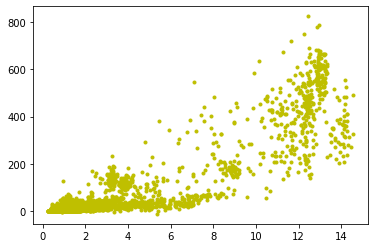

In [30]:
x = df_dynamic_ch.mean_sq_dist**(-1)
y = df_conduct_ch.ec
plt.plot(x, y, '.', color='y')

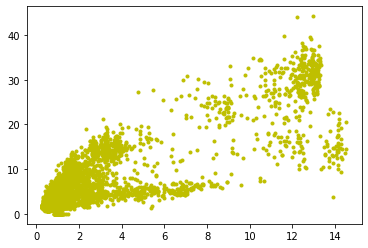

In [31]:
x = df_dynamic_ch.mean_sq_dist**(-1)
y = df_conduct_ch.hc
plt.plot(x, y, '.', color='y')

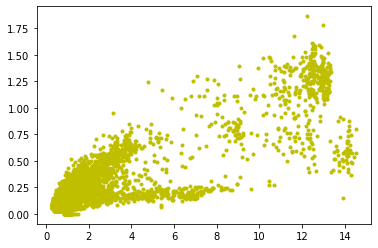

In [32]:
x = df_dynamic_ch.mean_sq_dist**(-1)
y = df_conduct_ch.lambdx
plt.plot(x, y, '.', color='y')

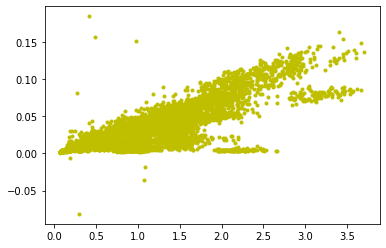

In [34]:
x = df_dynamic_ch.mean_sq_dist
y = df_conduct_ch.lambdx/df_conduct_ch.ec
plt.plot(x, y, '.', color='y')

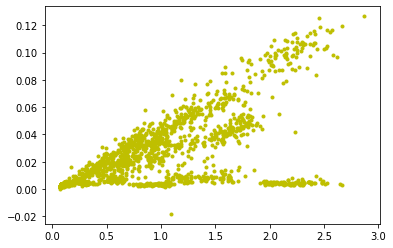

In [42]:
pairmap = top

x = df_dynamic_ch.mean_sq_dist.loc[pairmap]
y = df_conduct_ch.lambdx.loc[pairmap]/df_conduct_ch.ec.loc[pairmap]
plt.plot(x, y, '.', color='y')

# Data Smoothing
    - usage: 
    1. adjust the bin size of both top and bottom data points
    2. after running the code, see the figure, and determine if the bin size is good or not
## Input
    - out/block_dynamic_ch.csv
    - out/block_conduct_ch.csv
    - out/pairs_ch.csv
    - top
    - bottom
## Output
    - top_bin = 0.1
    - bottom_bin = 0.1
    - top_data: smoothed data points, column0: inverse msd, column1: irec, column2:irhc, column3:lambda
    - bottom_data: smoothed data points, column0: inverse msd, column1: irec, column2:irhc, column3:lambda

In [3]:
# Load csv files ################################################
df_dynamic_ch = pd.read_csv('out/block_dynamic_ch.csv', header=[0, 1], index_col=0)
df_conduct_ch = pd.read_csv('out/block_conduct_ch.csv', header=[0, 1], index_col=0)
pairs_ch = pd.read_csv('out/pairs_ch.csv', header=0, index_col=0)

# Unit convert fs -> ps, A -> nm
df_dynamic_ch.mean_sq_dist = df_dynamic_ch.mean_sq_dist/100
df_dynamic_ch.mean_dist = df_dynamic_ch.mean_dist/10
df_dynamic_ch.mean_variance = df_dynamic_ch.mean_variance/100

df_conduct_ch.ec = df_conduct_ch.ec*1000
df_conduct_ch.hc = df_conduct_ch.hc*10
df_conduct_ch.lambdx = df_conduct_ch.lambdx

# tob and bottom info
bottom = [2,3,4,5,6,7,8,9,10,14,15,17,18,19,20,22,23,24,26,27,28,29,30,32,33,34,36,37,38,39,41,43,47,49,50,52,54,55,58,61]
top = [0,1,11,12,13,16,21,25,31,35,40,42,44,45,46,51,53,56,57,59,60]

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in double_scalars
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/Users/gen

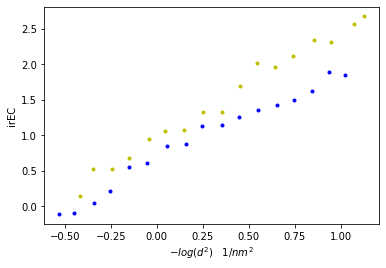

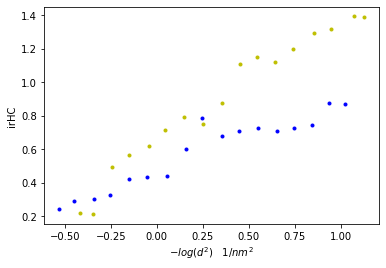

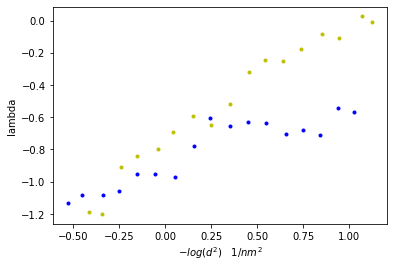

In [6]:
import math

# bin size
top_bin = 0.1
bottom_bin = 0.1
x_min = -0.7
x_max = 1.3
x_len = x_max - x_min

top_tmp = np.zeros((5, int(x_len/top_bin)))
bottom_tmp = np.zeros((5, int(x_len/bottom_bin)))

for i in top:
    for j, msd in enumerate(df_dynamic_ch.mean_sq_dist.loc[i]):
        if df_conduct_ch.ec.loc[i][j] > 0:
            tmp = math.floor(np.log10(msd**(-1))/top_bin) - math.floor(x_min/top_bin)
            top_tmp[0][tmp] += np.log10(msd**(-1))
            top_tmp[1][tmp] += np.log10(df_conduct_ch.ec.loc[i][j])
            top_tmp[2][tmp] += np.log10(df_conduct_ch.hc.loc[i][j])
            top_tmp[3][tmp] += np.log10(df_conduct_ch.lambdx.loc[i][j])            
            top_tmp[4][tmp] += 1
            
for i in bottom:
    for j, msd in enumerate(df_dynamic_ch.mean_sq_dist.loc[i]):
        if df_conduct_ch.ec.loc[i][j] > 0:        
            tmp = math.floor(np.log10(msd**(-1))/bottom_bin) - math.floor(x_min/top_bin)
            bottom_tmp[0][tmp] += np.log10(msd**(-1))
            bottom_tmp[1][tmp] += np.log10(df_conduct_ch.ec.loc[i][j])
            bottom_tmp[2][tmp] += np.log10(df_conduct_ch.hc.loc[i][j])
            bottom_tmp[3][tmp] += np.log10(df_conduct_ch.lambdx.loc[i][j])
            bottom_tmp[4][tmp] += 1

top_data = np.zeros((5, int(x_len/top_bin)))
bottom_data = np.zeros((5, int(x_len/bottom_bin)))
for i in range(int(x_len/top_bin)):
    top_data[0][i] = top_tmp[0][i]/top_tmp[4][i]
    top_data[1][i] = top_tmp[1][i]/top_tmp[4][i]
    top_data[2][i] = top_tmp[2][i]/top_tmp[4][i]
    top_data[3][i] = top_tmp[3][i]/top_tmp[4][i]
    top_data[4][i] = 1
    
for i in range(int(x_len/bottom_bin)):
    bottom_data[0][i] = bottom_tmp[0][i]/bottom_tmp[4][i]
    bottom_data[1][i] = bottom_tmp[1][i]/bottom_tmp[4][i]
    bottom_data[2][i] = bottom_tmp[2][i]/bottom_tmp[4][i]
    bottom_data[3][i] = bottom_tmp[3][i]/bottom_tmp[4][i]
    bottom_data[4][i] = 1


#########################################
# Removing nan results from both top_data and bottom data
tmp = top_data.transpose()
top_data = tmp[~np.isnan(tmp).any(axis=1)].transpose()

tmp = bottom_data.transpose()
bottom_data = tmp[~np.isnan(tmp).any(axis=1)].transpose()

# save file
np.save('out/top_data_ch',top_data)
np.save('out/bottom_data_ch',bottom_data)

####################################3
# Visualize
# irEC vs inverse variance
x = top_data[0]
y = top_data[1]
x2 = bottom_data[0]
y2 = bottom_data[1]
plt.plot(x, y, '.', color='y')
plt.plot(x2, y2, '.', color='b')
plt.xlabel(r'$-log(d^{2})$   $1/nm^2$')
plt.ylabel('irEC')
plt.show()

# irHC vs inverse variance
x = top_data[0]
y = top_data[2]
x2 = bottom_data[0]
y2 = bottom_data[2]
plt.plot(x, y, '.', color='y')
plt.plot(x2, y2, '.', color='b')
plt.xlabel(r'$-log(d^{2})$   $1/nm^2$')
plt.ylabel('irHC')
plt.show()

# lambda vs inverse variance
x = top_data[0]
y = top_data[3]
x2 = bottom_data[0]
y2 = bottom_data[3]
plt.plot(x, y, '.', color='y')
plt.plot(x2, y2, '.', color='b')

plt.xlabel(r'$-log(d^{2})$   $1/nm^2$')
plt.ylabel('lambda')
plt.show()

# Linear Regression
## Input
    - top_data
    - bottom_data
## Output
    - coefficients of LINE OF BEST FIT for irec, irhc, lambda vs inverse variance

In [143]:
conduc_id = 3 # 1 is irec, 2 is irhc, 3 is lambda
top_data = np.load('out/top_data_ch.npy')
bottom_data = np.load('out/bottom_data_ch.npy')

# Linear Regression
# results for top data
results = sm.OLS(top_data[conduc_id].reshape((len(top_data[conduc_id]),1)), \
                 np.concatenate((top_data[4].reshape((len(top_data[4]),1)),top_data[0].reshape((len(top_data[0]),1))),axis=1)\
                 ).fit()
print(results.summary())

# results for bottom data
results = sm.OLS(bottom_data[conduc_id].reshape((len(bottom_data[conduc_id]),1)), \
                 np.concatenate((bottom_data[4].reshape((len(bottom_data[4]),1)),bottom_data[0].reshape((len(bottom_data[0]),1))),axis=1)\
                 ).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     354.8
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.42e-11
Time:                        20:55:02   Log-Likelihood:                 18.588
No. Observations:                  16   AIC:                            -33.18
Df Residuals:                      14   BIC:                            -31.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7781      0.026    -30.474      0.0

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


# Scaling Relations: Making Figures

## Input
    - top_data
    - bottom_data
    - Scaling data from Leitner et al. for myoglobin and HP36. Used for 'irEC_vs_msd-1'.
## Output
    - fig/logirec_vs_logmsd-1.png
    - fig/irec_vs_msd-1.png
    - fig/logirhc_vs_logmsd-1.png
    - fig/irhc_vs_msd-1.png
    - fig/loglambda_vs_logmsd-1.png
    - fig/lambda_vs_msd-1.png

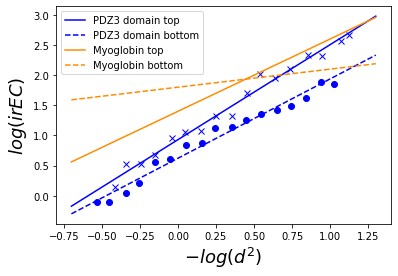

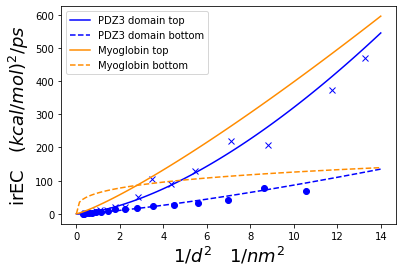

In [23]:
# ENERGY CONDUCTIVITY

# import data
top_data = np.load('out/top_data_ch.npy')
bottom_data = np.load('out/bottom_data_ch.npy')

# log-log plot
x1 = top_data[0]
y1 = top_data[1]
x2 = bottom_data[0]
y2 = bottom_data[1]
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

x_1 = np.linspace(-0.7, 1.3, 20)
coeffs = [0.9293, 1.5770]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_1])

x_2 = np.linspace(-0.7, 1.3, 20)
coeffs = [0.6206, 1.3170]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_2])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_2, y_2, '--', color='blue', label='PDZ3 domain bottom')

x_ref = np.linspace(-0.7, 1.3, 20)
coeffs = [1.4, 1.2]
y_myo1 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_ref])

coeffs = [1.8, 0.3]
y_myo2 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_ref])
plt.plot(x_ref, y_myo1, '-', color='darkorange', label='Myoglobin top')
plt.plot(x_ref, y_myo2, '--', color='darkorange', label='Myoglobin bottom')

#plt.legend()
plt.legend()
plt.xlabel(r'$-log(d^{2})$', fontsize=18)
plt.ylabel(r'$log(irEC)$', fontsize=18)
plt.savefig('fig/logirec_vs_logmsd-1', dpi=300, bbox_inches = 'tight')
plt.show()

# normal plot
x1 = 10**(top_data[0])
y1 = 10**(top_data[1])
x2 = 10**(bottom_data[0])
y2 = 10**(bottom_data[1])
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

# power law
x_1 = np.linspace(0, 14, 100)
coeffs = [0, 10**(0.9293)]
exp = [0,1.5770]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])

coeffs = [0, 10**(0.6206)]
exp = [0,1.3170]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_1, y_2, '--', color='blue', label='PDZ3 domain bottom')


coeffs = [0, 10**(1.4)]
exp = [0,1.2]
y_myo1 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
coeffs = [0, 10**(1.8)]
exp = [0,0.3]
y_myo2 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])

plt.plot(x_1, y_myo1, '-', color='darkorange', label='Myoglobin top')
plt.plot(x_1, y_myo2, '--', color='darkorange', label='Myoglobin bottom')

plt.legend()
plt.xlabel(r'$1/d^{2}$   $1/nm^2$', fontsize=18)
plt.ylabel(r'irEC   $(kcal/mol)^2 /ps$', fontsize=18)
plt.savefig('fig/irec_vs_msd-1', dpi=300, bbox_inches = 'tight')
plt.show()

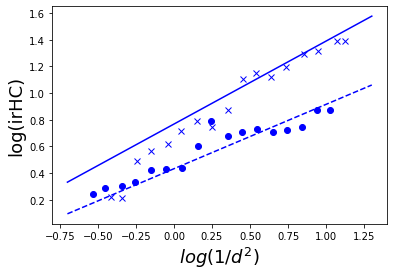

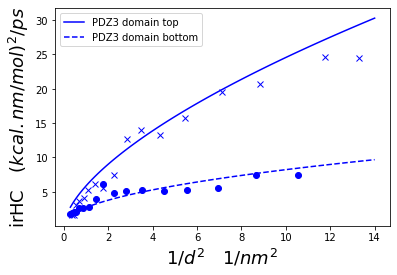

In [24]:
# HEAT CONDUCTIVITY

# import data
top_data = np.load('out/top_data_ch.npy')
bottom_data = np.load('out/bottom_data_ch.npy')

# log-log plot
x1 = top_data[0]
y1 = top_data[2]
x2 = bottom_data[0]
y2 = bottom_data[2]
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

x_1 = np.linspace(-0.7, 1.3, 100)
coeffs = [0.7672, 0.6230]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_1])
coeffs = [0.4320, 0.4834]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_1])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_1, y_2, '--', color='blue', label='PDZ3 domain bottom')

#plt.legend()
plt.xlabel(r'$log(1/d^{2})$', fontsize=18)
plt.ylabel(r'log(irHC)', fontsize=18)
plt.savefig('fig/logirhc_vs_logmsd-1', dpi=300, bbox_inches = 'tight')
plt.show()

# normal plot
x1 = 10**(top_data[0])
y1 = 10**(top_data[2])
x2 = 10**(bottom_data[0])
y2 = 10**(bottom_data[2])
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

x_1 = np.linspace(0.3, 14, 100)
coeffs = [0, 10**(0.7672)]
exp = [0,0.6230]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
coeffs = [0, 10**(0.4320)]
exp = [0,0.4834]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_1, y_2, '--', color='blue', label='PDZ3 domain bottom')

plt.legend()
plt.xlabel(r'$1/d^{2}$   $1/nm^2$', fontsize=18)
plt.ylabel(r'irHC   $(kcal.nm/mol)^2 /ps$', fontsize=18)
plt.savefig('fig/irhc_vs_msd-1', dpi=300, bbox_inches = 'tight')
plt.show()

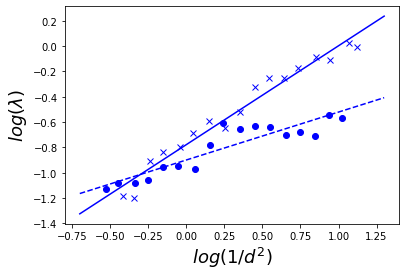

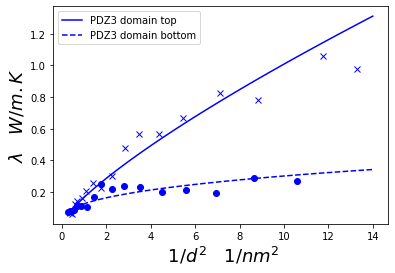

In [25]:
# THERMAL CONDUCTIVITY

# import data
top_data = np.load('out/top_data_ch.npy')
bottom_data = np.load('out/bottom_data_ch.npy')

# log-log plot
x1 = top_data[0]
y1 = top_data[3]
x2 = bottom_data[0]
y2 = bottom_data[3]
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

x_1 = np.linspace(-0.7, 1.3, 100)
coeffs = [-0.7781, 0.7813]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_1])
coeffs = [-0.8995, 0.3788]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**i) for i in range(len(coeffs))])) for j in x_1])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_1, y_2, '--', color='blue', label='PDZ3 domain bottom')

#plt.legend()
plt.xlabel(r'$log(1/d^{2})$', fontsize=18)
plt.ylabel(r'$log(\lambda)$', fontsize=18)
plt.savefig('fig/loglambda_vs_logmsd-1', dpi=300, bbox_inches = 'tight')
plt.show()

# normal plot
x1 = 10**(top_data[0])
y1 = 10**(top_data[3])
x2 = 10**(bottom_data[0])
y2 = 10**(bottom_data[3])
plt.plot(x1, y1, 'x', color='blue')
plt.plot(x2, y2, 'o', color='blue')

x_1 = np.linspace(0.3, 14, 100)
coeffs = [0, 10**(-0.7781)]
exp = [0,0.7813]
y_1 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
coeffs = [0, 10**(-0.8995)]
exp = [0,0.3788]
y_2 = np.array([np.sum(np.array([coeffs[i]*(j**exp[i]) for i in range(len(coeffs))])) for j in x_1])
plt.plot(x_1, y_1, '-', color='blue', label='PDZ3 domain top')
plt.plot(x_1, y_2, '--', color='blue', label='PDZ3 domain bottom')

plt.legend()
plt.xlabel(r' $1/d^{2}$   $1/nm^2$', fontsize=18)
plt.ylabel(r'$\lambda$   $W/m.K$', fontsize=18)
plt.savefig('fig/lambda_vs_msd-1', dpi=300, bbox_inches = 'tight')
plt.show()